In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scienceplots
plt.style.use('science')
import Merger_rate_plot as merg

In [13]:
import astropy.units as u
from astropy.cosmology import WMAP9 as cosmo
from astropy.cosmology import z_at_value
from astropy import constants as const

In [2]:
df_binary = pd.read_csv("Data/binary-merger-data.csv",index_col= False)
df_binary.head()

,M1,M2,t_merger,Merger,Type
0,4.496151e+39,3.239131e+39,8.587741e+08,Yes,iso
1,3.210830e+39,2.142212e+39,8.934006e+08,Yes,iso
2,1.303374e+40,2.337819e+39,4.120229e+09,Yes,iso
3,1.399764e+40,1.245462e+40,8.933714e+10,No,iso
4,2.344612e+40,6.574773e+39,1.421714e+10,No,iso


In [3]:
df_trip = pd.read_csv("Data/triples-data-with-flags.csv",index_col= False)
df_trip.head()

,Unnamed: 0,Mass 1,Mass 2,Mass 3,t_merger,Flag
0,0,2.150737e+07,8.204738e+06,5.276829e+07,1.985633e+09,No
1,1,1.546540e+08,4.211761e+07,3.132749e+08,5.529691e+09,Tr
2,2,1.546540e+08,4.211761e+07,3.132749e+08,3.025313e+09,No
3,3,1.546540e+08,4.211761e+07,3.132749e+08,1.972738e+09,No
4,4,9.436961e+06,1.002870e+06,4.551391e+08,4.814316e+09,No


In [6]:
#  GW Recoil includes merger from binary + Tr + Tr-ej cases

t_binary = df_binary[(df_binary["Type"] == "iso") & (df_binary["Merger"] == "Yes")]["t_merger"].to_numpy()
t_triples = df_trip[(df_trip["Flag"] == "Tr-ej") | (df_trip["Flag"] == "Tr")]["t_merger"].to_numpy()

In [10]:
type(t_triples)

numpy.ndarray

In [12]:
t_GW_kick = np.concatenate([t_binary,t_triples])

In [19]:
t_slingshot = df_trip[(df_trip["Flag"] == "Tr-ej")]["t_merger"].to_numpy()

In [21]:
z_slingshot = z_at_value(cosmo.age, (t_slingshot/10**9)*u.Gyr,zmin=1e-9)
z_slingshot = np.array(z_slingshot)

In [14]:
z_bh_kick = z_at_value(cosmo.age, (t_GW_kick/10**9)*u.Gyr,zmin=1e-9)
z_bh_kick = np.array(z_bh_kick)

In [15]:
zmax = 7
zbinsize = 0.2
lgzbinsize=0.15
lgzmin=-3.0
lgzmax = 1.0

In [16]:
merger_rate,lgzbins_kick,dNdlogzdt_kick = merg.merger_rate_log_plot(z_bh_kick,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax)

total merger rate (yr^-1):  0.20014750018244334


In [24]:
merger_rate_slingshot,lgzbins_slingshot,dNdlogzdt_slingshot = merg.merger_rate_log_plot(z_slingshot,zmax,zbinsize,0.3,lgzmin,lgzmax)

total merger rate (yr^-1):  0.0022787901357811946


In [25]:
merger_rate,lgzbins_kick,dNdlogzdt_kick = merg.merger_rate_log_plot(z_bh_kick,zmax,zbinsize,lgzbinsize,lgzmin,lgzmax)

total merger rate (yr^-1):  0.20014750018244334


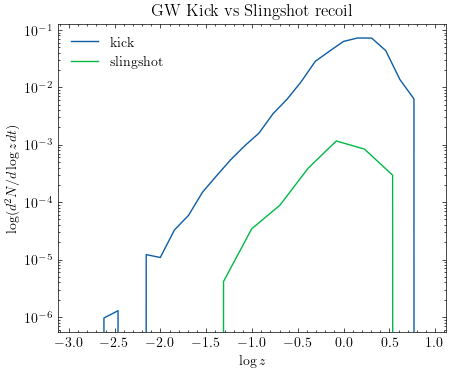

In [37]:
plt.figure(figsize=[5,4])
plt.plot(lgzbins_kick,dNdlogzdt_kick,label="kick")
plt.plot(lgzbins_slingshot,dNdlogzdt_slingshot,label="slingshot")
plt.yscale("log")
plt.legend()
plt.xlabel("$\log z$")
plt.ylabel("$\log (d^2 N / d \log z dt)$")
plt.title("GW Kick vs Slingshot recoil")
plt.savefig("Figures/GW_kick_vs_slingshot_rates.pdf")